<a href="https://colab.research.google.com/github/sf-rahul/Tensorflow/blob/master/Drug_effectiveness_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('train.csv',parse_dates=["drug_approved_by_UIC"])

In [3]:
print("Train shape :" ,train.shape)
#print("Test shape :", test.shape)

Train shape : (32165, 8)


In [4]:
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782


In [0]:
#list(train) == list(test)

In [6]:
list(train)

['patient_id',
 'name_of_drug',
 'use_case_for_drug',
 'review_by_patient',
 'effectiveness_rating',
 'drug_approved_by_UIC',
 'number_of_times_prescribed',
 'base_score']

In [0]:
#list(test)

In [8]:
train.values.shape[0]

32165

In [9]:
train.patient_id.unique().size

32165

In [10]:
train.use_case_for_drug.unique().size

636

In [11]:
train.name_of_drug.unique().size

2220

In [0]:
def common_conditions(conditions):
  items = {}
  for cond in conditions:
    #print(cond)
    if(items.get(cond)==None):
      items[cond] = 1;
    else :
      items[cond] = items[cond]+1
  return items



In [13]:
conditionCount = common_conditions(train['use_case_for_drug'])
print(sorted(conditionCount.items(), key = 
             lambda kv:(kv[1], kv[0]))) 

[('27</span> users found this comment helpful.', 1), ('34</span> users found this comment helpful.', 1), ('35</span> users found this comment helpful.', 1), ('42</span> users found this comment helpful.', 1), ('43</span> users found this comment helpful.', 1), ('61</span> users found this comment helpful.', 1), ('63</span> users found this comment helpful.', 1), ('75</span> users found this comment helpful.', 1), ('79</span> users found this comment helpful.', 1), ('92</span> users found this comment helpful.', 1), ('94</span> users found this comment helpful.', 1), ('Acetaminophen Overdose', 1), ('Acute Promyelocytic Leukemia', 1), ('Adult Human Growth Hormone Deficiency', 1), ('Anal Itching', 1), ('Anaplastic Oligodendroglioma', 1), ('Anemia Associated with Chronic Renal Failure', 1), ('Anesthetic Adjunct', 1), ('Anorexia/Feeding Problems', 1), ('Antiphospholipid Syndrome', 1), ('Ascariasis', 1), ('Aspiration Pneumonia', 1), ('Asystole', 1), ('Atherosclerosis', 1), ('Auditory Process

In [14]:
#using pandas for the same task.
usecases = train.use_case_for_drug.value_counts().sort_values(ascending=False)
usecases[:10]

Birth Control      5795
Depression         1791
Pain               1273
Anxiety            1174
Acne               1101
Bipolar Disorde     815
Insomnia            772
Obesity             727
Weight Loss         717
ADHD                627
Name: use_case_for_drug, dtype: int64

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot');



In [0]:
plt.rcParams['figure.figsize'] = [12,8]

Text(0, 0.5, 'count')

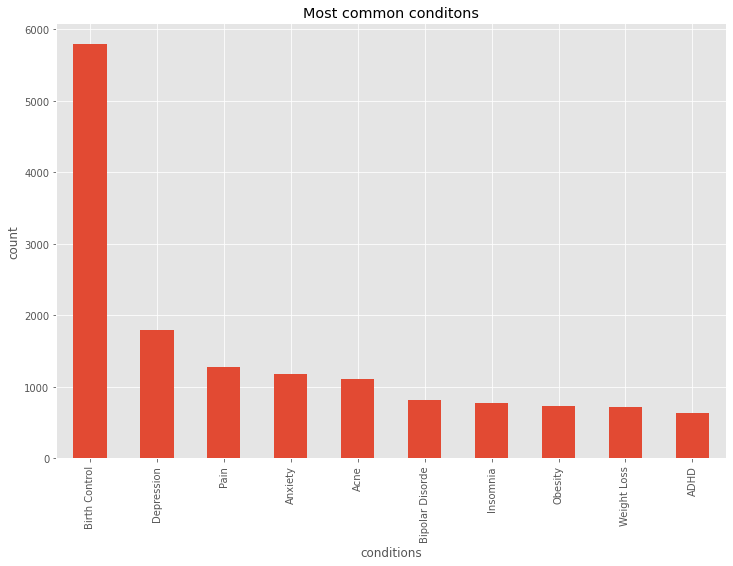

In [17]:
usecases[:10].plot(kind='bar')
plt.title('Most common conditons')
plt.xlabel('conditions')
plt.ylabel('count')

**Rating distribution**

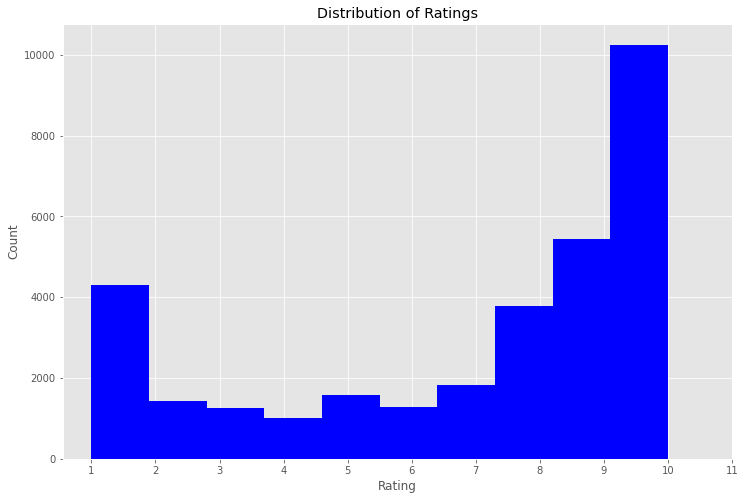

In [18]:
train.effectiveness_rating.hist(color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 12)]);

Text(0, 0.5, 'count')

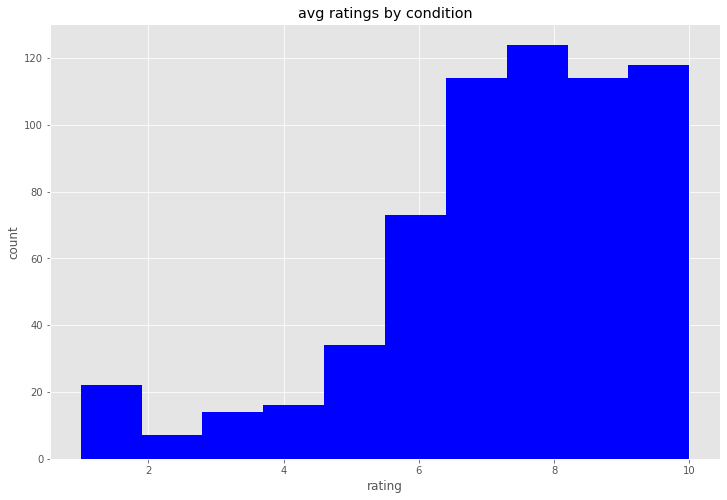

In [19]:
rating_avgs = (train.effectiveness_rating.groupby(train.use_case_for_drug).mean())
rating_avgs.hist(color='blue')
plt.title('avg ratings by condition')
plt.xlabel('rating')
plt.ylabel('count')

Text(0, 0.5, 'count')

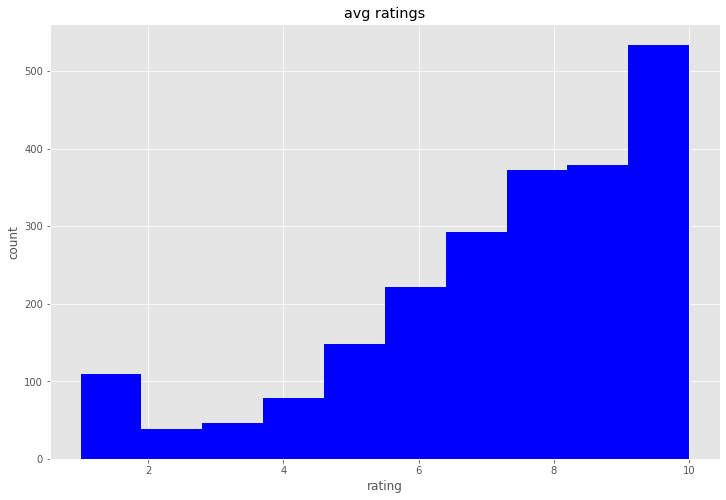

In [20]:
rating_avgs = (train.effectiveness_rating.groupby(train.name_of_drug).mean())
rating_avgs.hist(color='blue')
plt.title('avg ratings')
plt.xlabel('rating')
plt.ylabel('count')

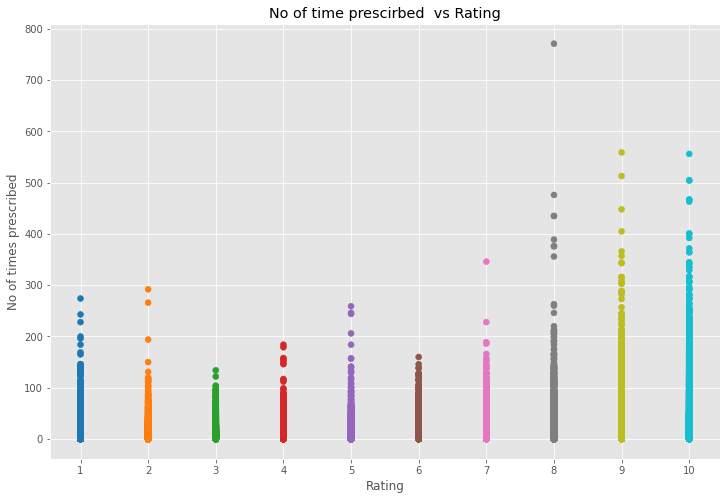

In [21]:
plt.scatter(train.effectiveness_rating,train.number_of_times_prescribed,c=train.effectiveness_rating.values,cmap='tab10' )
plt.title('No of time prescirbed  vs Rating')
plt.xlabel('Rating')
plt.ylabel('No of times prescribed')
plt.xticks([i for i in range(1, 11)]);

In [45]:
# Create a list (cast into an array) containing the average #prescribed for given ratings
usefullness = []

for i in range(1,11):
  usefullness.append([i,np.sum(train[train.effectiveness_rating==i].number_of_times_prescribed)/np.sum(train.effectiveness_rating==i)])

use_arr = np.asarray(usefullness)
use_arr

array([[ 1.        , 15.24074505],
       [ 2.        , 16.08860759],
       [ 3.        , 15.78374112],
       [ 4.        , 15.73715415],
       [ 5.        , 16.80392157],
       [ 6.        , 20.18774244],
       [ 7.        , 23.1419214 ],
       [ 8.        , 29.10406762],
       [ 9.        , 34.34905139],
       [10.        , 37.18981662]])

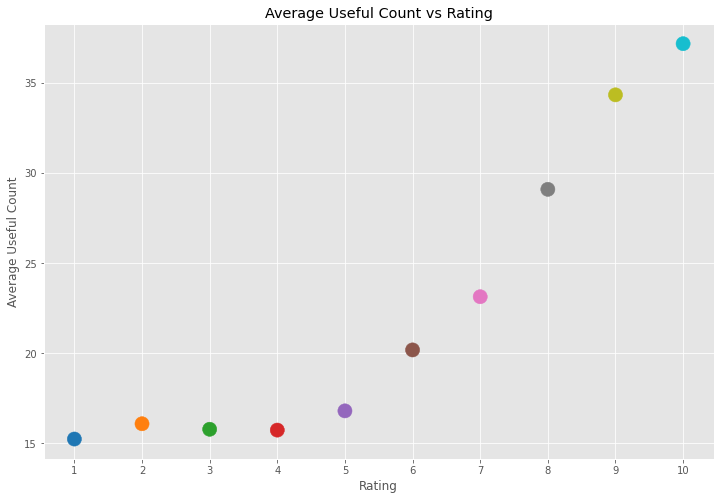

In [46]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 11)]);

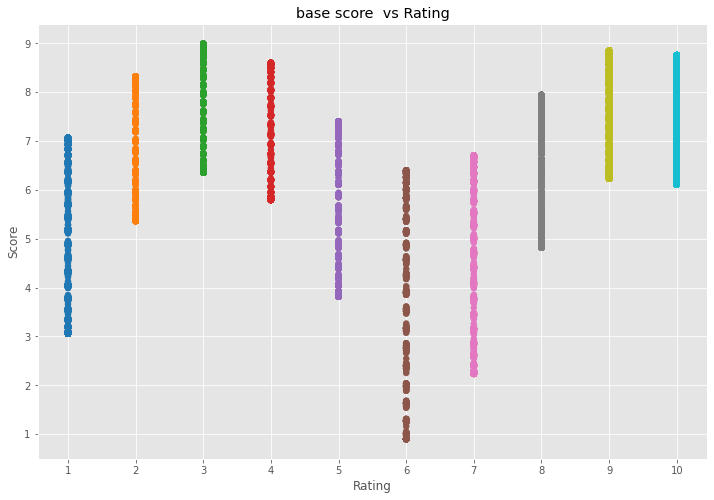

In [48]:
#finding correleation between the base score and the rating.

plt.scatter(train.effectiveness_rating,train.base_score,c=train.effectiveness_rating.values,cmap='tab10' )
plt.title('base score  vs Rating')
plt.xlabel('Rating')
plt.ylabel('Score')
plt.xticks([i for i in range(1, 11)]);

In [0]:
#here we can see that the score is godd for either high rating or low rating.

In [49]:
usefullness = []

for i in range(1,11):
  usefullness.append([i,np.sum(train[train.effectiveness_rating==i].base_score)/np.sum(train.effectiveness_rating==i)])

use_arr = np.asarray(usefullness)
use_arr

array([[ 1.        ,  5.22909411],
       [ 2.        ,  6.84124123],
       [ 3.        ,  7.71518236],
       [ 4.        ,  7.24423864],
       [ 5.        ,  5.6529383 ],
       [ 6.        ,  4.1523909 ],
       [ 7.        ,  4.72819004],
       [ 8.        ,  6.43163701],
       [ 9.        ,  7.58064177],
       [10.        ,  7.47222061]])

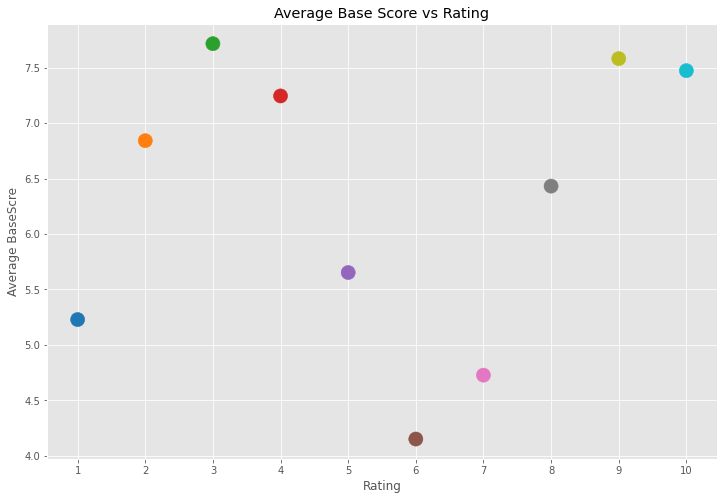

In [50]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Base Score vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average BaseScre')
plt.xticks([i for i in range(1, 11)]);

In [60]:
useful_train = train.sort_values(by='base_score',ascending=False)
useful_train[useful_train.effectiveness_rating==9] #max avg score is at 3,9

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
9555,218793,Opana ER,Pain,"""It actually worked""",9,2008-07-29,22,8.853339
13605,170601,Quetiapine,Major Depressive Disorde,"""Seroquel for depression isn&#039;t heard of m...",9,2014-11-28,22,8.853339
12623,81670,Liraglutide,Obesity,"""I&#039;ve only been on this half a week, but ...",9,2017-06-12,22,8.853339
25552,148233,Norethindrone,Birth Control,"""I&#039;ve been on Lyza for a month. I&#039;v...",9,2014-07-14,22,8.853339
28237,149959,Soma,Muscle Spasm,"""It&#039;s the best muscle spasm reliever I&#0...",9,2011-12-07,22,8.853339
...,...,...,...,...,...,...,...,...
22470,228018,Etonogestrel,Birth Control,"""I have had the Implanon in since Septemmber o...",9,2011-05-09,0,6.227844
15914,216293,Ogestrel-28,Birth Control,"""I switched to this because it is the highest ...",9,2017-04-02,0,6.227844
2625,26048,Sprintec,Birth Control,"""I&#039;ve seen so many negative comments abou...",9,2017-12-01,0,6.227844
17793,230564,Depo-Provera,0</span> users found this comment helpful.,"""I have been using Depo for about 9 months. I ...",9,2011-06-03,0,6.227844
